In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
all_cryptos_df = pd.read_csv("all-cryptos.csv") #Read in project data
all_cryptos_df.head()

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume        market  close_ratio  spread  
0  134.21     0.0  1.488567e+09       0.5438    3.88  
1  144.54     0.0  1.603769e+09       0.7813   13.49  
2  139.00     0.0  1.542813e+09       0.3843   12.88  
3  116.99     0.0  1.298955e+09       0.2882   32.17  
4  105.21     0.0  1.168517e+09       0.3881   33.32

In [4]:
cleaned_all_cryptos = all_cryptos_df[all_cryptos_df['date'].str.startswith("2018")] #Only use historical price data from 2018
cleaned_all_cryptos = cleaned_all_cryptos[all_cryptos_df['date'] != "2018-11-30"]
cleaned_all_cryptos['daily_returns'] = (cleaned_all_cryptos['close'] - cleaned_all_cryptos['open']) / (cleaned_all_cryptos['open']) * 100 #create daily percentage returns column
cleaned_all_cryptos.head()

/Users/gabrielkhouri-haddad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


slug symbol     name        date  ranknow     open     high      low  \
1709  bitcoin    BTC  Bitcoin  2018-01-01        1  14112.2  14112.2  13154.7   
1710  bitcoin    BTC  Bitcoin  2018-01-02        1  13625.0  15444.6  13163.6   
1711  bitcoin    BTC  Bitcoin  2018-01-03        1  14978.2  15572.8  14844.5   
1712  bitcoin    BTC  Bitcoin  2018-01-04        1  15270.7  15739.7  14522.2   
1713  bitcoin    BTC  Bitcoin  2018-01-05        1  15477.2  17705.2  15202.8   

        close        volume        market  close_ratio  spread  daily_returns  
1709  13657.2  1.029120e+10  2.291192e+11       0.5248   957.5      -3.224161  
1710  14982.1  1.684660e+10  2.513779e+11       0.7972  2281.0       9.960367  
1711  15201.0  1.687190e+10  2.550806e+11       0.4895   728.3       1.487495  
1712  15599.2  2.178320e+10  2.617953e+11       0.8846  1217.5       2.151178  
1713  17429.5  2.384090e+10  2.925441e+11       0.8898  2502.4      12.614039

In [5]:
names = cleaned_all_cryptos['name'].unique() #Use unique names to calculate each crypto's beta
names

array(['Bitcoin', 'XRP', 'Ethereum', ..., '42-coin', 'Bit20', 'Project-X'],
      dtype=object)

In [6]:
names = [x.lower() for x in names]

In [7]:
def calculate_risk(names, percentages):
    score = 0;
    for i in range(len(names)):
        x = cleaned_all_cryptos[cleaned_all_cryptos['symbol'].str.lower() == names[i].lower()]['daily_returns']
        if (x.empty):
            print(names[i] + ' doesnt exist!')
            return -1
        score += percentages[i] * np.var(x)
    for i in range(len(names)):
        for j in range(len(names)):
            first = cleaned_all_cryptos[cleaned_all_cryptos['symbol'].str.lower() == names[i]]
            second = cleaned_all_cryptos[cleaned_all_cryptos['symbol'].str.lower() == names[j]]
            if (i != j):
                if (first.shape[0] < second.shape[0]):
                    arr = first['date']
                    second = second[second['date'].isin(arr)]
                if (first.shape[0] > second.shape[0]):
                    arr = second['date']
                    first = first[first['date'].isin(arr)]
                score += percentages[i] * percentages[j] * np.cov(first['daily_returns'], second['daily_returns'])[0][1]
    return np.sqrt(score)

In [8]:
top_cryptos = ["btc", "eth", "bnb", "usdt","ada", "xrp", "doge"]
top_cryptos_pts = [1/7] * 7

import itertools
risks = list()
portfolios = list()
all_portfolio_combinations = itertools.combinations(top_cryptos, 4)
num_combinations = sum(1 for _ in all_portfolio_combinations)
i = 1
for portfolio in itertools.combinations(top_cryptos, 4):
    percentages = [.25] * 4
    portfolios.append(portfolio)
    risks.append(calculate_risk(portfolio, percentages))
    print(i, '/', num_combinations)
    i += 1

1 / 35
2 / 35
3 / 35
4 / 35
5 / 35
6 / 35


KeyboardInterrupt: 

In [ ]:
df_portfolio_risks = pd.DataFrame({"Porfolio": portfolios, "Risk": risks}).sort_values("Risk", ascending = True)
df_portfolio_risks

In [ ]:
import matplotlib.pyplot as plt
data = df_portfolio_risks['Risk']
bins = np.linspace(0, 10, 10)
plt.hist(data, bins = bins)
plt.xlabel("Risk Bin")
plt.ylabel("Number of Cryptos")

In [1]:
#Create data visualizations for lowest risk portfolio using matplotlib

#Take portfolio with lowest risk
min_portfolio = df_portfolio_risks.iloc[0][0]

#Draw the portfolio plots
plt.rcParams['figure.figsize'] = (15,6)
plt.title('Lowest Risk Portfolio Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns As A Percentage')

portfolio_cryptos = cleaned_all_cryptos[cleaned_all_cryptos['symbol'].str.lower().isin(min_portfolio)]
for symbol in min_portfolio:
    crypto = portfolio_cryptos[portfolio_cryptos['symbol'].str.lower() == symbol]
    plt.plot(crypto['date'], crypto['daily_returns'], label = symbol)

plt.legend()
plt.show()

NameError: name 'df_portfolio_risks' is not defined

/Users/gabrielkhouri-haddad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


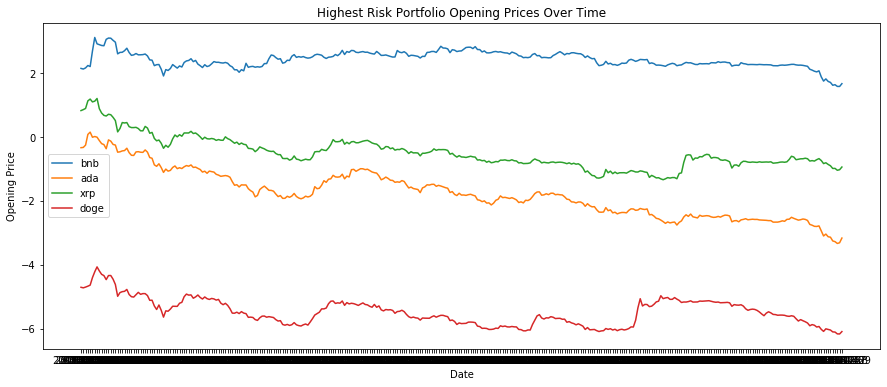

In [165]:
#Create data visualizations for highest risk portfolio using matplotlib

#Take portfolio with highest risk
max_portfolio = df_portfolio_risks.iloc[-1][0]

#Draw the portfolio plots
plt.rcParams['figure.figsize'] = (15,6)
plt.title('Highest Risk Portfolio Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns As A Percentage')

portfolio_cryptos = cleaned_all_cryptos[cleaned_all_cryptos['symbol'].str.lower().isin(max_portfolio)]
for symbol in max_portfolio:
    crypto = portfolio_cryptos[portfolio_cryptos['symbol'].str.lower() == symbol]
    plt.plot(crypto['date'], crypto['daily_returns'], label = symbol)

plt.legend()
plt.show()

In [174]:
all_cryptos_pivot = cleaned_all_cryptos[['name', 'date', 'daily_returns']]
all_cryptos_pivot = all_cryptos_pivot.pivot(index = 'date', columns='name', values='daily_returns')
all_cryptos_pivot

name           0chain         0x  0xBitcoin    0xcert     1World      2GIVE  \
date                                                                          
2018-01-01        NaN  -2.945856        NaN       NaN        NaN   2.281653   
2018-01-02        NaN   2.373724        NaN       NaN        NaN   2.784000   
2018-01-03        NaN   8.328711        NaN       NaN        NaN  -1.410462   
2018-01-04        NaN   7.294602        NaN       NaN        NaN   8.708181   
2018-01-05        NaN   7.692308        NaN       NaN        NaN   1.991933   
...               ...        ...        ...       ...        ...        ...   
2018-11-25  13.448287   2.530978   0.811355 -2.803738  25.478326  -0.906002   
2018-11-26  -8.869064  -5.605499   4.281824 -3.714424  -7.225688  -7.441328   
2018-11-27   2.037828   2.982685  14.336863 -5.786350 -10.866628  -3.279703   
2018-11-28  12.505963  21.820696  14.986618  5.669291  11.811448  21.597444   
2018-11-29  -4.342042   0.220087 -12.556764 -6.262425 -10.411745   0.628601   

name        300 Token    42-coin       4NEW    808Coin  ...     imbrex  \
date                                                    ...              
2018-01-01  -3.425202  -6.640193        NaN -29.687500  ...  55.274809   
2018-01-02  10.272236   6.546471        NaN  52.222222  ...  33.381556   
2018-01-03   1.971270  -4.123183        NaN  38.686131  ...  24.644772   
2018-01-04 -14.627162  -2.679536        NaN  44.148936  ...   6.034465   
2018-01-05  -0.988913  16.389156        NaN  11.029412  ...  56.557377   
...               ...        ...        ...        ...  ...        ...   
2018-11-25   0.000000   5.576388   6.506273   4.545455  ... -15.242678   
2018-11-26   0.000000 -12.659166  -4.370629   4.347826  ...  -8.937702   
2018-11-27 -24.036822   6.476628 -13.203933   4.166667  ...   5.186075   
2018-11-28  10.739108   1.600140  -4.327135  -8.000000  ...   3.524828   
2018-11-29   1.052774  -9.365569  -1.699004  13.043478  ...  38.593681   

name         indaHash       nDEX      nUSD  savedroid  smARTOFGIVING  \
date                                                                   
2018-01-01        NaN        NaN       NaN        NaN            NaN   
2018-01-02        NaN        NaN       NaN        NaN            NaN   
2018-01-03        NaN        NaN       NaN        NaN            NaN   
2018-01-04        NaN        NaN       NaN        NaN            NaN   
2018-01-05        NaN        NaN       NaN        NaN            NaN   
...               ...        ...       ...        ...            ...   
2018-11-25   1.661342  -7.692308  2.595511   4.812834       3.568853   
2018-11-26  -5.475142 -16.666667 -1.216654  -6.410256      -6.088625   
2018-11-27   4.930047   0.000000  2.974798   1.923077      13.562241   
2018-11-28  24.445149  40.000000  0.203645  13.978495      11.189158   
2018-11-29  -0.533944 -14.285714 -1.930200   6.352941      -0.308227   

name          ugChain     vSlice  vSportCoin  wys Token  
date                                                     
2018-01-01        NaN  11.742661         NaN        NaN  
2018-01-02        NaN  19.813001         NaN        NaN  
2018-01-03        NaN  11.833142         NaN        NaN  
2018-01-04        NaN   1.023564         NaN        NaN  
2018-01-05        NaN  35.146615         NaN        NaN  
...               ...        ...         ...        ...  
2018-11-25  19.182004  20.221607   14.439324   3.015751  
2018-11-26 -12.105263 -21.782559   -5.174731  -8.864784  
2018-11-27   4.521809  -0.294985    0.142248  -3.473079  
2018-11-28  11.762452  21.597633   -1.487252  19.970194  
2018-11-29 -10.962658   2.019386    3.942652  -3.154351  

[333 rows x 2071 columns]

In [175]:
bitcoin = all_cryptos_pivot['Bitcoin']
bitcoin_std = np.std(bitcoin)
bitcoin_std

4.197064213801932

In [176]:
all_cryptos_std = all_cryptos_pivot.std()
all_cryptos_std

name
0chain           11.196596
0x                8.667910
0xBitcoin        12.294369
0xcert            8.647202
1World           17.099081
                   ...    
smARTOFGIVING    19.064647
ugChain           8.654829
vSlice           14.384376
vSportCoin        6.342447
wys Token        19.117453
Length: 2071, dtype: float64

In [177]:
#Create the correlation matrix for each day
all_cryptos_pivot_corr = all_cryptos_pivot.corr()
all_cryptos_pivot_corr

name             0chain        0x  0xBitcoin    0xcert    1World     2GIVE  \
name                                                                         
0chain         1.000000  0.304554   0.158435  0.187974  0.176082  0.226657   
0x             0.304554  1.000000   0.277649  0.299893  0.118428  0.514044   
0xBitcoin      0.158435  0.277649   1.000000  0.186425  0.134714  0.261954   
0xcert         0.187974  0.299893   0.186425  1.000000  0.078943  0.378154   
1World         0.176082  0.118428   0.134714  0.078943  1.000000  0.118889   
...                 ...       ...        ...       ...       ...       ...   
smARTOFGIVING  0.302229  0.102713   0.114493  0.218384  0.279347  0.149938   
ugChain        0.242235  0.530855   0.361629  0.398690  0.204545  0.510994   
vSlice         0.250926  0.217872   0.035231  0.071530  0.064710  0.250707   
vSportCoin     0.243491  0.478198   0.123499  0.466281  0.286419  0.319623   
wys Token      0.027577  0.199683  -0.037990  0.213231  0.046865  0.066116   

name           300 Token   42-coin      4NEW   808Coin  ...    imbrex  \
name                                                    ...             
0chain          0.120068 -0.155526  0.295931 -0.010025  ...  0.040049   
0x              0.219823  0.177985  0.076265  0.126242  ...  0.164926   
0xBitcoin       0.027908  0.049148  0.069338  0.035027  ...  0.053724   
0xcert          0.184543 -0.014908 -0.053771 -0.052807  ...  0.036498   
1World         -0.000082  0.091622  0.119107 -0.046479  ...  0.021280   
...                  ...       ...       ...       ...  ...       ...   
smARTOFGIVING   0.017210 -0.068050  0.050743 -0.036275  ...  0.085907   
ugChain         0.147396  0.146021  0.065410  0.114831  ...  0.122921   
vSlice          0.044771  0.092335  0.005816  0.014658  ...  0.103761   
vSportCoin     -0.030298 -0.007338  0.048236 -0.069898  ...  0.155271   
wys Token       0.181658  0.146806 -0.052996  0.171774  ...  0.073308   

name           indaHash      nDEX      nUSD  savedroid  smARTOFGIVING  \
name                                                                    
0chain         0.257254  0.234976  0.059822   0.183534       0.302229   
0x             0.304353  0.378052  0.041560   0.442481       0.102713   
0xBitcoin      0.315122  0.057090 -0.025690   0.054235       0.114493   
0xcert         0.274483  0.369605 -0.043076   0.321514       0.218384   
1World         0.040872  0.207602  0.136836   0.144986       0.279347   
...                 ...       ...       ...        ...            ...   
smARTOFGIVING  0.141843  0.123600  0.125854  -0.029036       1.000000   
ugChain        0.377089  0.286557  0.234484   0.375279       0.134764   
vSlice         0.206106  0.126113  0.065443   0.064450       0.300791   
vSportCoin     0.243727  0.086410  0.219577   0.582724       0.077086   
wys Token      0.166186  0.093496  0.134377   0.103933      -0.127244   

name            ugChain    vSlice  vSportCoin  wys Token  
name                                                      
0chain         0.242235  0.250926    0.243491   0.027577  
0x             0.530855  0.217872    0.478198   0.199683  
0xBitcoin      0.361629  0.035231    0.123499  -0.037990  
0xcert         0.398690  0.071530    0.466281   0.213231  
1World         0.204545  0.064710    0.286419   0.046865  
...                 ...       ...         ...        ...  
smARTOFGIVING  0.134764  0.300791    0.077086  -0.127244  
ugChain        1.000000  0.256013    0.508137   0.226187  
vSlice         0.256013  1.000000    0.150361   0.058195  
vSportCoin     0.508137  0.150361    1.000000   0.147529  
wys Token      0.226187  0.058195    0.147529   1.000000  

[2071 rows x 2071 columns]

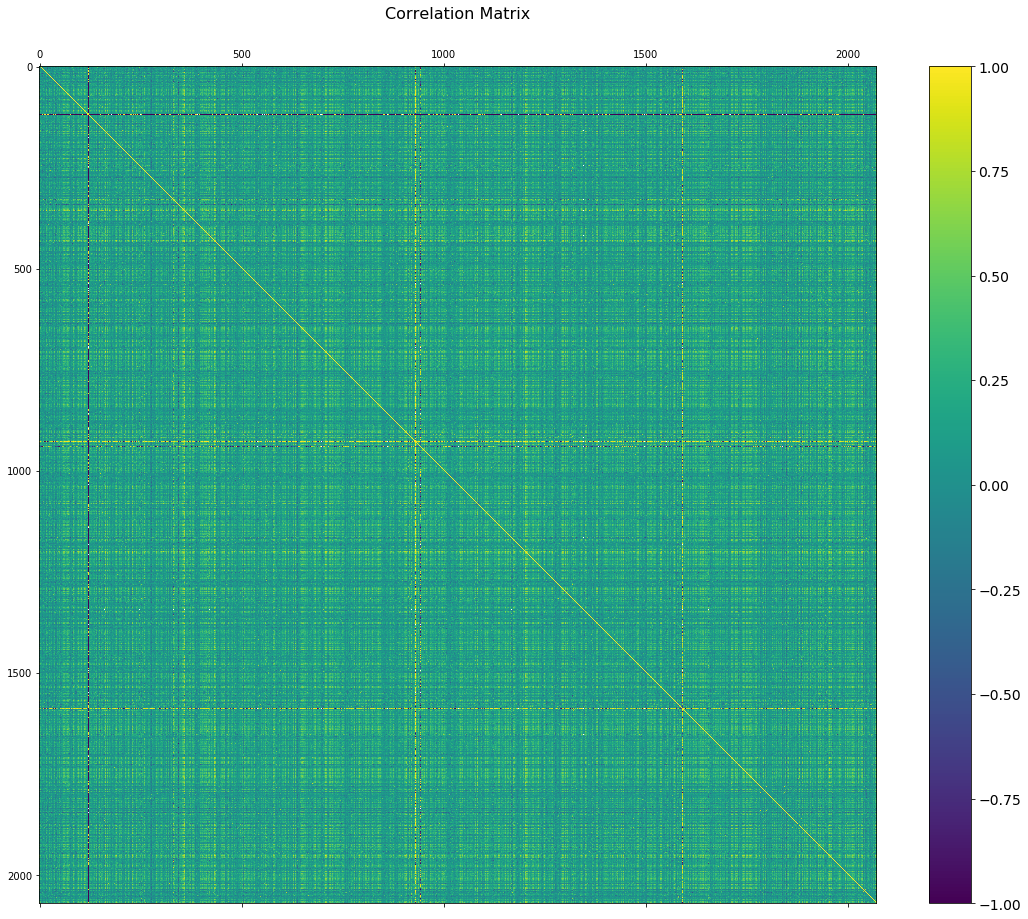

In [178]:
#Visualize the correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(all_cryptos_pivot_corr, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [182]:
top_10_cryptos = ['Bitcoin', 'Ethereum', 'Binance Coin', 'Tether', 'Cardano', 'XRP', 'Dogecoin', 'USD Coin', 'Chainlink', 'Litecoin']
top_10_cryptos = all_cryptos_pivot[top_10_cryptos]
top_10_cryptos_corr = top_10_cryptos.corr()
top_10_cryptos_corr

name           Bitcoin  Ethereum  Binance Coin    Tether   Cardano       XRP  \
name                                                                           
Bitcoin       1.000000  0.805754      0.612311  0.026507  0.706071  0.641520   
Ethereum      0.805754  1.000000      0.533614 -0.018834  0.767810  0.727240   
Binance Coin  0.612311  0.533614      1.000000  0.047291  0.419136  0.424759   
Tether        0.026507 -0.018834      0.047291  1.000000 -0.035309 -0.098211   
Cardano       0.706071  0.767810      0.419136 -0.035309  1.000000  0.766936   
XRP           0.641520  0.727240      0.424759 -0.098211  0.766936  1.000000   
Dogecoin      0.628548  0.566886      0.501249  0.027740  0.534992  0.518473   
USD Coin     -0.232762 -0.229866     -0.178290  0.034673 -0.245115 -0.211173   
Chainlink     0.574513  0.595707      0.393207  0.000584  0.528614  0.463776   
Litecoin      0.824201  0.820239      0.585146 -0.004015  0.686658  0.678744   

name          Dogecoin  USD Coin  Chainlink  Litecoin  
name                                                   
Bitcoin       0.628548 -0.232762   0.574513  0.824201  
Ethereum      0.566886 -0.229866   0.595707  0.820239  
Binance Coin  0.501249 -0.178290   0.393207  0.585146  
Tether        0.027740  0.034673   0.000584 -0.004015  
Cardano       0.534992 -0.245115   0.528614  0.686658  
XRP           0.518473 -0.211173   0.463776  0.678744  
Dogecoin      1.000000 -0.061300   0.436238  0.636483  
USD Coin     -0.061300  1.000000  -0.162492 -0.264238  
Chainlink     0.436238 -0.162492   1.000000  0.515708  
Litecoin      0.636483 -0.264238   0.515708  1.000000

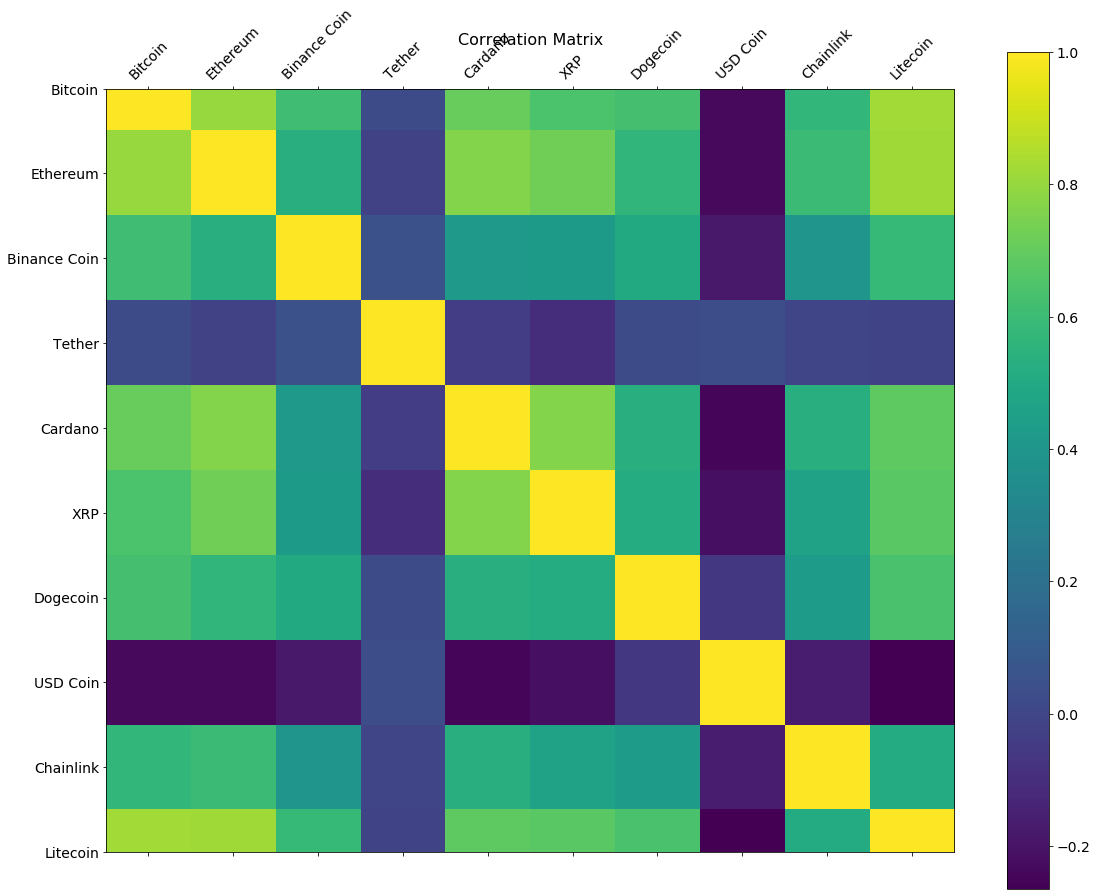

In [180]:
f = plt.figure(figsize=(19, 15))
plt.matshow(top_10_cryptos_corr, fignum=f.number)
plt.xticks(ticks=np.arange(10),labels=top_10_cryptos, fontsize=14, rotation=45)
plt.yticks(ticks=np.arange(10),labels=top_10_cryptos, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);